<a href="https://colab.research.google.com/github/MonirulIslamm08/Bangladesh_Weather_Predictions/blob/main/Bangladesh_Weather_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Weather_Data.csv')

In [3]:
data.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [4]:
data.shape

(3271, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

# EDA

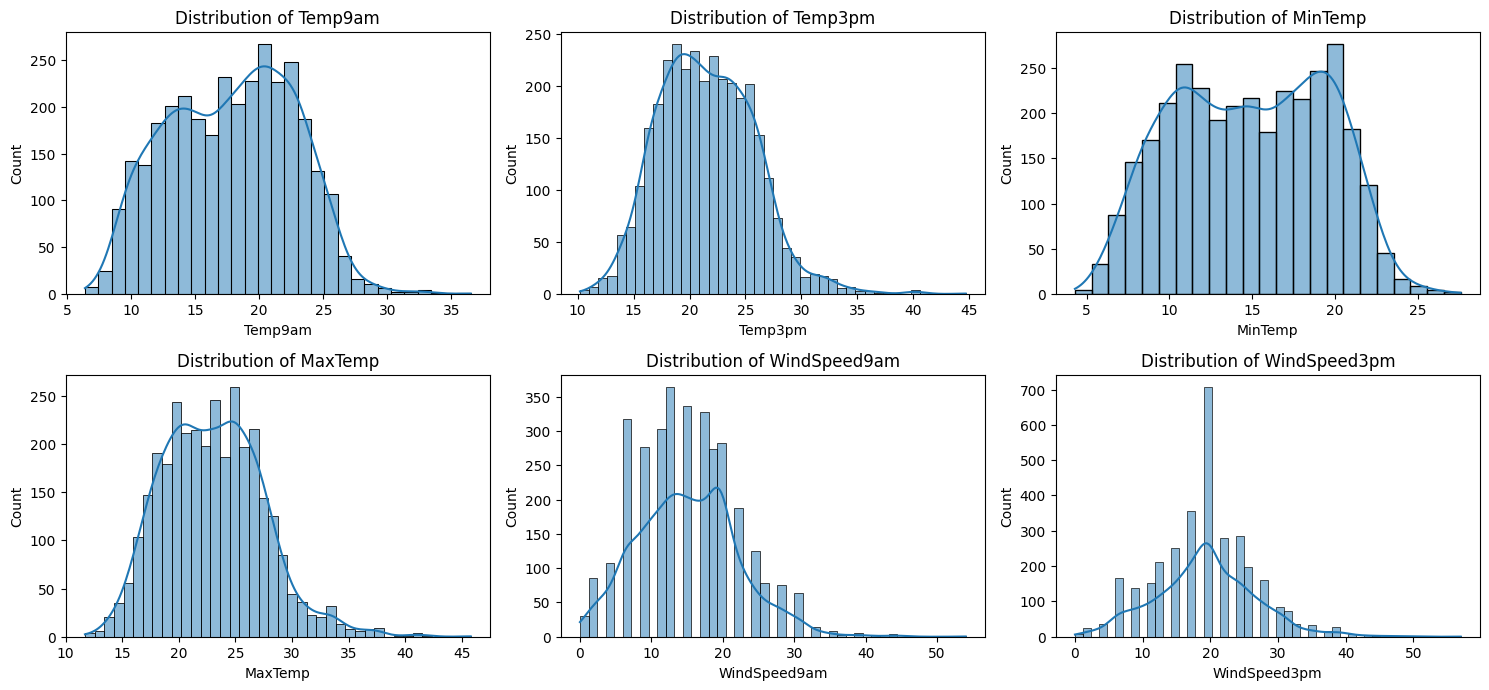

In [6]:
plt.figure(figsize=(15, 10))

for i, columns in enumerate(['Temp9am','Temp3pm','MinTemp','MaxTemp','WindSpeed9am','WindSpeed3pm'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[columns], kde=True)
  plt.title(f"Distribution of {columns}")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Wind Gust Distribution')

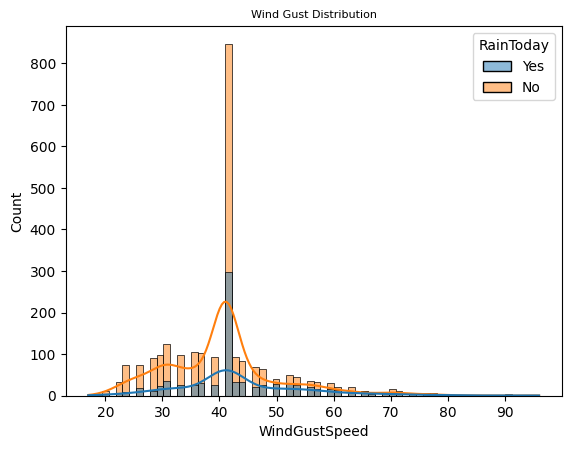

In [7]:
sns.histplot(data, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 8)

Text(0.5, 1.0, 'Cloud at 3pm Distribution')

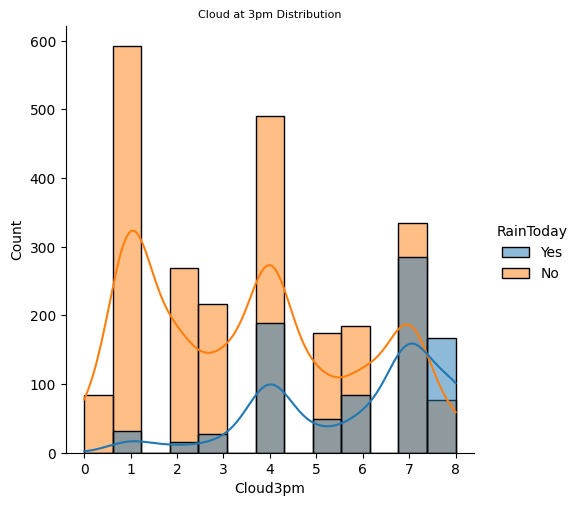

In [8]:
sns.displot(data, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 8)

# Average WindSpeed Analysis with EDA

In [9]:
windspeed_weather_data = data.groupby(data['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_data = windspeed_weather_data.reset_index()
windspeed_weather_data

,Date,WindSpeed9am,WindSpeed3pm
0,01,15.285171,17.403042
1,02,15.468504,18.228346
2,03,15.989247,18.053763
3,04,16.466667,19.396296
4,05,16.580645,18.419355
5,06,15.077778,18.807407
6,07,14.612903,20.229391
7,08,13.645161,20.114695
8,09,13.818519,21.203704
9,10,13.896057,21.007168


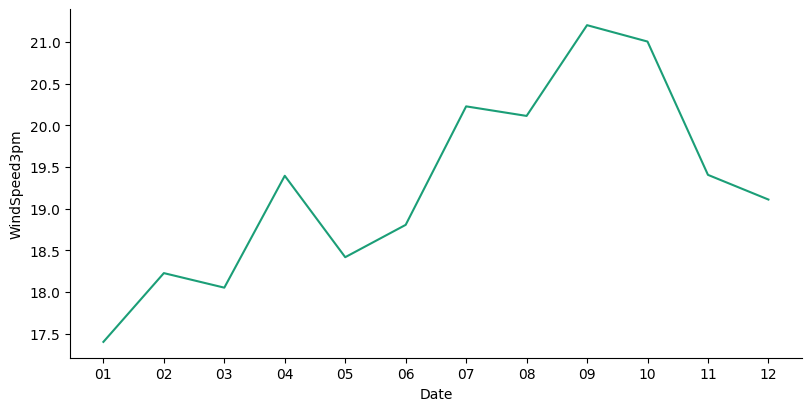

In [10]:
# @title Date vs WindSpeed3pm

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['WindSpeed3pm']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
df_sorted = windspeed_weather_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('WindSpeed3pm')

Text(0.5, 1.0, 'Month-wise observation of Average WindSpeed')

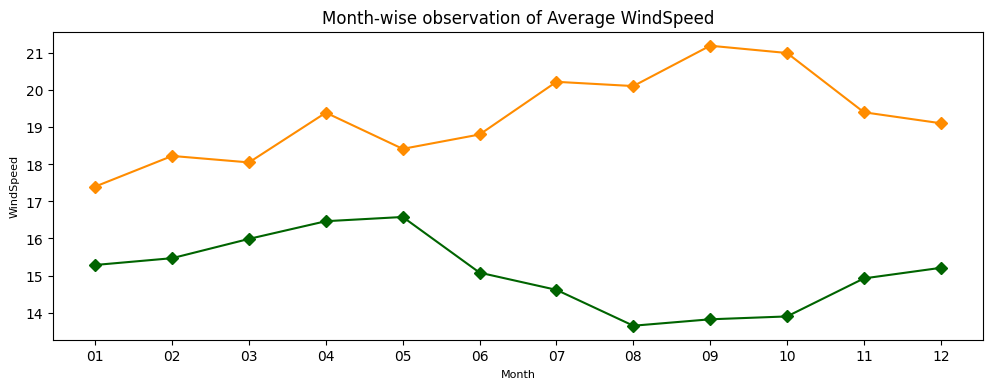

In [11]:
x = windspeed_weather_data.loc[:, 'Date']
y1 = windspeed_weather_data['WindSpeed9am']
y2 = windspeed_weather_data['WindSpeed3pm']

plt.figure(figsize = (12, 4))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am')
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Month', fontsize = 8)
plt.ylabel('WindSpeed', fontsize = 8)
plt.title('Month-wise observation of Average WindSpeed', fontsize = 12)

# Data  preprocessing..

In [12]:
#Convert the Date column to datetime format.
data['date'] = pd.to_datetime(data['Date'])

<ipython-input-12-afb283a51e3c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['Date'])


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
data.duplicated().any()

False

In [15]:
data['RainToday'].value_counts()

,count
RainToday,
No,2422
Yes,849


In [16]:
data['WindDir9am'].value_counts()

,count
WindDir9am,
W,1260
WNW,485
SSW,185
S,156
E,141
ESE,134
SSE,121
NNW,103
N,100


#Encoding

In [17]:
#Encode the catagorical variable...
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
    data[col] = label_encoder.fit_transform(data[col])


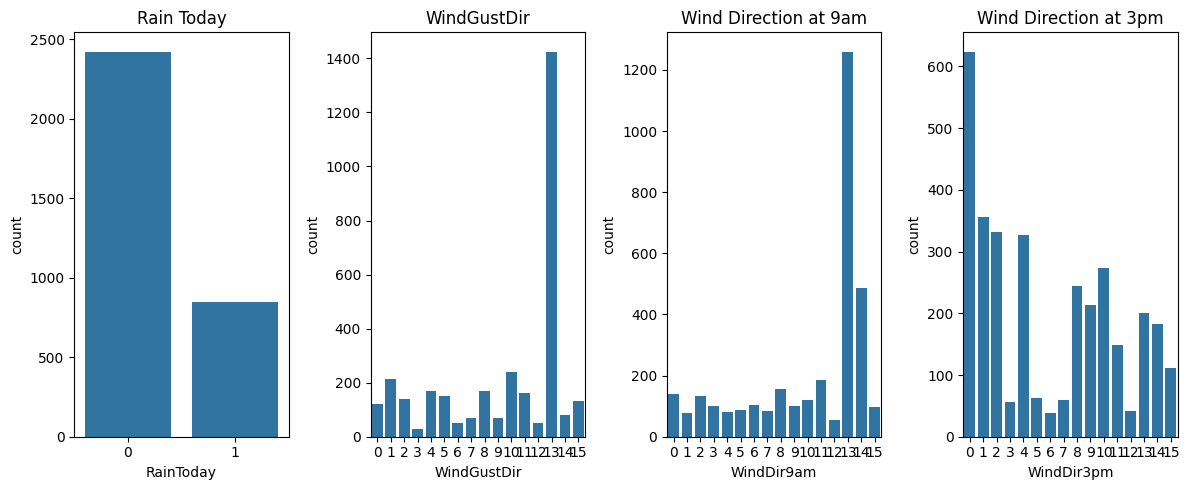

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))

sns.countplot(x='RainToday', data=data, ax=axes[0])
axes[0].set_title('Rain Today')

sns.countplot(x='WindGustDir', data=data, ax=axes[1])
axes[1].set_title('WindGustDir')

sns.countplot(x='WindDir9am', data=data, ax=axes[2])
axes[2].set_title('Wind Direction at 9am')

sns.countplot(x='WindDir3pm', data=data, ax=axes[3])
axes[3].set_title('Wind Direction at 3pm')

plt.tight_layout()
plt.show()

# Detect outliers

In [19]:
cols =data.select_dtypes(include=['float64','int64']).columns

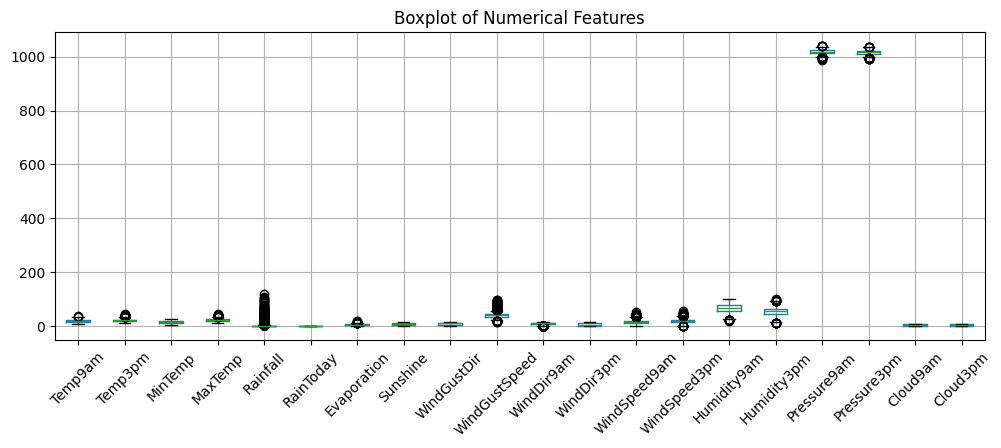

In [20]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 4))
data[cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

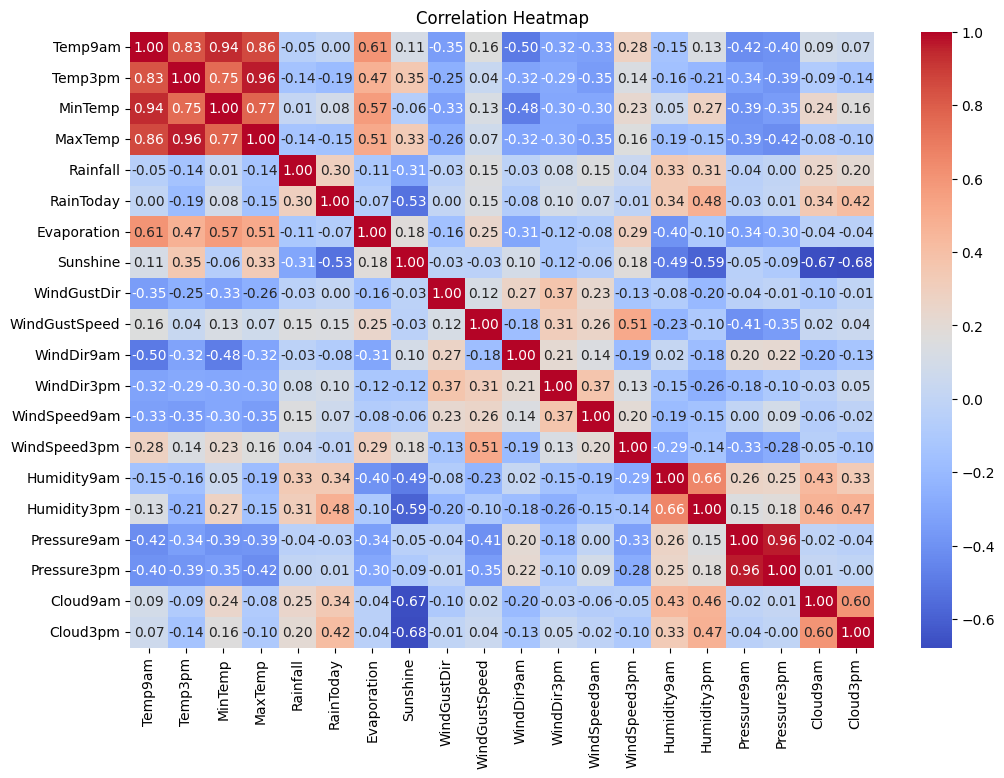

In [21]:
# Correlation heatmap to check relationships
plt.figure(figsize=(12, 8))
correlation_matrix = data[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
# using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(data[cols]))
data = data[(z_scores < 3).all(axis=1)]  # Removing rows with Z-scores > 3

In [23]:
data.drop('date', axis=1, inplace=True)

In [24]:
data[cols].columns

Index(['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Rainfall', 'RainToday',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

# OVERSAMPLING (for Imbalanced Datasets)
Synthetic Minority Over-sampling Technique (SMOTE): SMOTE generates synthetic samples for the minority class by interpolating between existing samples and their nearest neighbors. This increases the presence of the minority class in the training dataset without duplicating existing samples. It’s particularly effective as it reduces the chances of overfitting that can occur with simple random oversampling.

In [25]:
X = data[cols].drop(['RainToday'], axis=1)
y = data['RainToday']

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [27]:
# Check data types
print(X.dtypes)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

Temp9am          float64
Temp3pm          float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed      int64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
dtype: object


In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
X_resampled

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,20.700000,20.900000,19.500000,22.400000,15.600000,6.200000,0.000000,13,41,8,11,17,20,92,84,1017.600000,1017.400000,8,8
1,22.400000,24.800000,19.500000,25.600000,6.000000,3.400000,2.700000,13,41,13,0,9,13,83,73,1017.900000,1016.400000,7,7
2,23.500000,23.000000,21.600000,24.500000,6.600000,2.400000,0.100000,13,41,2,2,17,2,88,86,1016.700000,1015.600000,7,8
3,21.400000,20.900000,20.200000,22.800000,18.800000,2.200000,0.000000,13,41,5,0,22,20,83,90,1014.200000,1011.800000,8,8
4,23.800000,26.000000,20.200000,27.200000,1.600000,2.600000,8.600000,13,41,13,1,9,22,69,62,1002.700000,998.600000,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,20.123979,22.349319,19.015078,23.631518,7.256127,4.161674,0.291099,2,28,8,0,4,16,89,71,1019.626702,1017.993822,7,7
4646,21.120538,23.432786,17.943241,24.892607,1.634952,5.680359,7.686483,10,48,9,10,17,20,66,59,1020.949738,1020.675504,6,6
4647,18.458496,19.878711,13.462256,21.957959,2.644726,5.841504,9.879248,9,41,7,6,20,23,57,57,1017.416455,1015.564941,1,4
4648,17.064973,21.405586,14.906090,22.400000,2.284250,4.611172,6.176648,9,36,11,8,13,19,82,58,1024.240613,1022.122847,6,3


RainToday
1    0.5
0    0.5
Name: count, dtype: float64


<Axes: xlabel='RainToday', ylabel='count'>

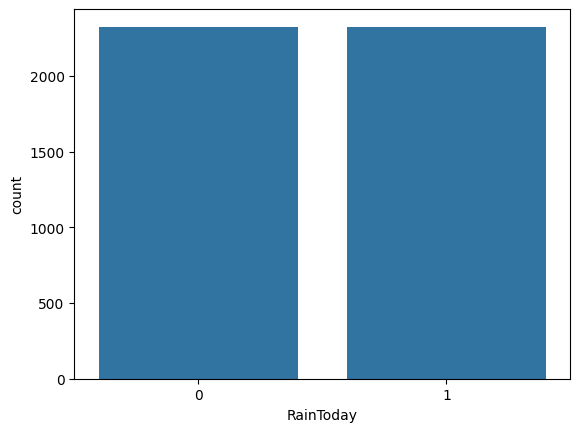

In [30]:
print(y_resampled.value_counts()/len(y_resampled))
sns.countplot(x=y_resampled)

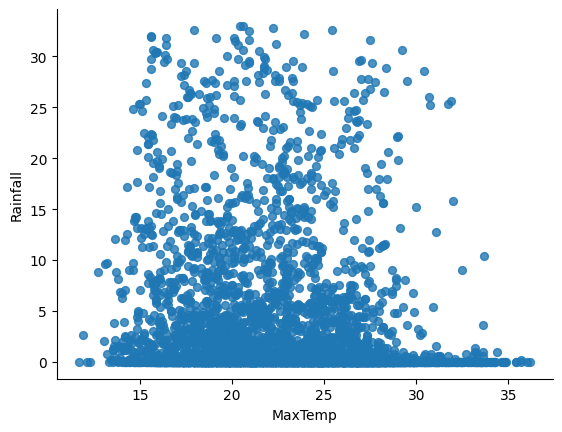

In [31]:
# @title MaxTemp vs Rainfall
from matplotlib import pyplot as plt
X_resampled.plot(kind='scatter', x='MaxTemp', y='Rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Split the balanced data into training and test sets

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Model analysis using

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model:

In [34]:
classfier = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=8, verbose=100),
    "LGBM": LGBMClassifier()
}

for name, clf in classfier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n=========={name}===========")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')
    print(accuracy_score(y_test, y_pred))


==========LogisiticRegression===========
[[360 106]
 [112 352]]


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       466
           1       0.77      0.76      0.76       464

    accuracy                           0.77       930
   macro avg       0.77      0.77      0.77       930
weighted avg       0.77      0.77      0.77       930



0.7655913978494624

==========RandomForestClassifier===========
[[390  76]
 [ 38 426]]


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       466
           1       0.85      0.92      0.88       464

    accuracy                           0.88       930
   macro avg       0.88      0.88      0.88       930
weighted avg       0.88      0.88      0.88       930



0.8774193548387097

==========DecisionTreeClassifier===========
[[351 115]
 [ 75 389]]


              precision    recall  f1-score   support

           0       0.82      0.75      0.7

**Hyperparameter tuning can significantly improve the performance of your CatBoost model by finding the optimal set of parameters. For hyperparameter tuning, GridSearchCV or CatBoost's inbuilt hyperparameter search tools can be used. Below is an example of hyperparameter tuning for the CatBoost model:
#Code for Hyperparameter Tuning with GridSearchCV

In [35]:


from sklearn.model_selection import GridSearchCV

# Define classifiers with their default settings

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LGBM": LGBMClassifier()
}

# Parameter grids for each classifier
param_grids = {
    "LogisticRegression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "RandomForestClassifier": {
        "n_estimators": [100, 300, 500],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "DecisionTreeClassifier": {
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "XGBClassifier": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 6, 8]
    },
    "CatBoost": {
        "iterations": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [4, 6, 8]
    },
    "LGBM": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [-1, 5, 10]
    }
}

# Perform GridSearchCV for each classifier
best_models = {}

for name, clf in classifiers.items():
    print(f"\n========== {name} Hyperparameter Tuning ==========")
    param_grid = param_grids.get(name, None)
    if param_grid is not None:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Parameters for {name}: {grid_search.best_params_}")
        print(f"Best Score for {name}: {grid_search.best_score_}")
    else:
        print(f"No parameter grid defined for {name}, skipping hypertuning.")
        clf.fit(X_train, y_train)
        best_models[name] = clf

# Evaluate each best model on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n========== {name} Evaluation ==========")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))




========== LogisticRegression Hyperparameter Tuning ==========
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}
Best Score for LogisticRegression: 0.7951612903225808

========== RandomForestClassifier Hyperparameter Tuning ==========
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best Score for RandomForestClassifier: 0.8698924731182797

========== DecisionTreeClassifier Hyperparameter Tuning ==========
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 2}
Best Score for DecisionTreeClassifier: 0.7879032258064517

========== XGBClassifier Hyperparameter Tuning ==========
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for XGBClassifier: {'learning_rate': 0.1, 'max_d

# Deployment

In [44]:
import pickle

# Save the best model (example for XGBoost)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_models, file)  # Save the entire dictionary of models
print("Model saved successfully.")

Model saved successfully.


In [56]:
# Load the model
with open('best_model.pkl', 'rb') as file:
    loaded_models = pickle.load(file)

# Verify the loaded models
print("Loaded models:", loaded_models.keys())


Loaded models: dict_keys(['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'XGBClassifier', 'CatBoost', 'LGBM'])


In [57]:
import os

file_path = 'best_model.pkl'
print(f"File size: {os.path.getsize(file_path)} bytes")

File size: 37571930 bytes


In [60]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the XGBoost model
with open('best_model.pkl', 'rb') as file:
    loaded_models = pickle.load(file)

xgb_model = loaded_models["XGBClassifier"]  # Use the XGBoost model from your pickle file

# API endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get JSON data from POST request

    # Extract features from the JSON payload
    try:
        features = np.array(data['features']).reshape(1, -1)
    except KeyError:
        return jsonify({"error": "Invalid input. 'features' key is required."}), 400

    # Predict with the XGBoost model
    prediction = xgb_model.predict(features)
    prediction_proba = xgb_model.predict_proba(features)

    # Return the prediction
    return jsonify({
        "prediction": int(prediction[0]),
        "prediction_proba": prediction_proba.tolist()
    })

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
